In [49]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib

def group_users_by_number_of_ratings(df):
    users_ratings = df.groupby('user_id').agg(
        rating_count=('item_id', 'count'),
    )
    users_ratings.sort_values(by='rating_count', inplace=True)
    users_ratings.reset_index(inplace=True)

    num_users_by_rating = users_ratings.groupby('rating_count').agg(
        num_users=('user_id', 'count'),
    )
    num_users_by_rating.reset_index(inplace=True)
    return num_users_by_rating
    

def group_users_by_number_of_plays(df):
    user_plays = df.groupby('user_id').agg(
        plays_count=('plays', 'sum'),
    )
    user_plays.sort_values(by='plays_count', inplace=True)
    user_plays.reset_index(inplace=True)

    num_users_by_plays = user_plays.groupby('plays_count').agg(
        num_users=('user_id', 'count'),
    )
    num_users_by_plays.reset_index(inplace=True)
    return num_users_by_plays

In [ ]:
# read csv without header, columns are:  user_id \t item_id \t artist_name \t plays
music_ratings_df = pd.read_csv('../datasets/downloads/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv', delimiter='\t', header=None, names=['user_id', 'item_id', 'artist_name', 'plays'])
music_ratings_df.drop(['artist_name'], axis=1, inplace=True)

In [50]:
# read csv without header, columns are:  user_id \t item_id \t artist_name \t plays
dataset_user_count = group_users_by_number_of_ratings(music_ratings_df)
dataset_user_play_count = group_users_by_number_of_plays(music_ratings_df)


In [51]:
dataset_user_count

,rating_count,num_users
0,0,10
1,1,46
2,2,54
3,3,76
4,4,63
...,...,...
124,130,1
125,131,2
126,138,1
127,149,1


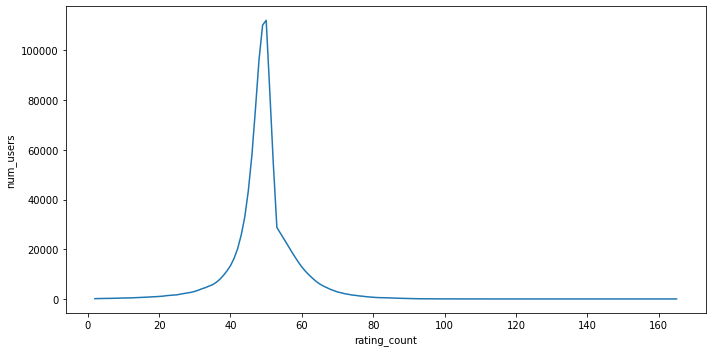

In [57]:

num_users_smooth_2 = dataset_user_count['num_users'].rolling(3).sum()

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=dataset_user_count['rating_count'], y=num_users_smooth_2, ax=ax, legend=False)
plt.tight_layout()
plt.show()
fig.savefig('../figures/num_users_by_rating_count.pgf')

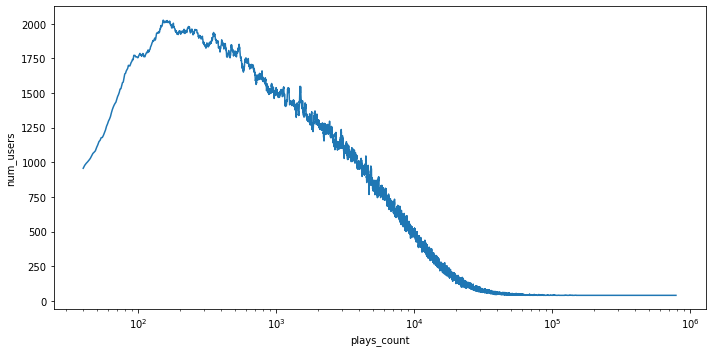

In [58]:

num_plays_smooth = dataset_user_play_count['num_users'].rolling(40).sum()

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=dataset_user_play_count['plays_count'], y=num_plays_smooth, ax=ax, legend=False)
# set x axes to log scale
ax.set_xscale('log')
plt.tight_layout()
plt.show()
fig.savefig('../figures/num_users_by_rating_count.pgf')